<a href="https://colab.research.google.com/github/TheBlackRus/liveproject_imbalanced_text/blob/master/liveproject_imbalanced_text_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np

In [43]:
import tensorflow as tf
data = tf.keras.datasets.imdb.load_data()

In [44]:
data

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [45]:
(x_train, y_train), (x_test, y_test) = data

In [46]:
positive  = np.where(y_train == 1)
negative  = np.where(y_train == 0)

In [47]:
len(x_train[0])
positive_review_len = list(map(len,x_train[positive]))
negative_review_len = list(map(len,x_train[negative]))

In [48]:
from collections import Counter
counter_pos = Counter(positive_review_len)
counter_neg = Counter(negative_review_len)

In [49]:
top_pos = counter_pos.most_common(1)
top_neg = counter_neg.most_common(1)

In [50]:
print("The most frequent length for pos rews is",top_pos[0][0],"and it occurs ",top_pos[0][0],"times")
print("The most frequent length for neg rews is",top_neg[0][0],"and it occurs ",top_neg[0][0],"times")

The most frequent length for pos rews is 125 and it occurs  125 times
The most frequent length for neg rews is 132 and it occurs  132 times


[Text(0, 0.5, 'frequency of occurence'), Text(0.5, 0, 'total word count')]

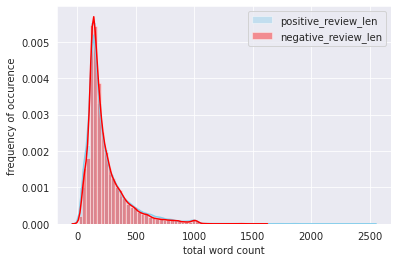

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.set_style('darkgrid')
fig, ax = plt.subplots()
sns.distplot( positive_review_len , color="skyblue", label="positive_review_len")
sns.distplot( negative_review_len, color="red", label="negative_review_len")
ax.legend()
ax.set(xlabel="total word count",ylabel="frequency of occurence")
#sns.plt.legend()


In [52]:
word_index = tf.keras.datasets.imdb.get_word_index(path="imdb_word_index.json")

In [53]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [62]:
idx2words = {idx:word for word, idx in word_index.items()}
for word in x_train[0]:
  print(idx2words[word])

the
as
you
with
out
themselves
powerful
lets
loves
their
becomes
reaching
had
journalist
of
lot
from
anyone
to
have
after
out
atmosphere
never
more
room
titillate
it
so
heart
shows
to
years
of
every
never
going
villaronga
help
moments
or
of
every
chest
visual
movie
except
her
was
several
of
enough
more
with
is
now
current
film
as
you
of
mine
potentially
unfortunately
of
you
than
him
that
with
out
themselves
her
get
for
was
camp
of
you
movie
sometimes
movie
that
with
scary
but
pratfalls
to
story
wonderful
that
in
seeing
in
character
to
of
70s
musicians
with
heart
had
shadows
they
of
here
that
with
her
serious
to
have
does
when
from
why
what
have
critics
they
is
you
that
isn't
one
will
very
to
as
itself
with
other
tricky
in
of
seen
over
landed
for
anyone
of
gilmore's
br
show's
to
whether
from
than
out
themselves
history
he
name
half
some
br
of
'n
odd
was
two
most
of
mean
for
1
any
an
boat
she
he
should
is
thought
frog
but
of
script
you
not
while
history
he
heart
to
real
at
barrel
but
whe